The data has different types of diseases for tomato leaves.
Here goes the list:

- Tomato_mosaic_virus
- Target_Spot
- Bacterial_spot
- Tomato_Yellow_Leaf_Curl_Virus
- Late_blight
- Leaf_Mold
- Early_blight
- Spider_mites Two-spotted_spider_mite
- Tomato___healthy
- Septoria_leaf_spot

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sads03","key":"590663479af63581616de36e4b642d5b"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kaustubhb999/tomatoleaf

 94% 169M/179M [00:01<00:00, 66.9MB/s]
100% 179M/179M [00:01<00:00, 97.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/tomatoleaf.zip","r")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###***Data Augmentation:***
- It will generates the new images by considering very less image data..
- This will takes one image and perform rotation on it and then it will perform some shifting operation on images , genearting distortion in wiedth and height thats how it works...
- So it will generates images like comceot droft in data so it will also helps to reduce ovefitting issue...

In [ ]:
train_data_dir = "/content/tomato/train"
test_data_dir = "/content/tomato/val"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1/255.,
                                   shear_range = 0.2, # squzzing and streching image
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   validation_split=0.3) # this is for validation split

#### *We used flow_from_directory is for genearting the images by DataAugmentation and saving in train gen from train_directory*

In [ ]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [ ]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [ ]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 1000 images belonging to 10 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 32)        0

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.001)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(monitor='val_loss',patience=8,verbose=1,mode='max',restore_best_weights=True)

In [ ]:
history = model.fit(train_gen,epochs=10,validation_data=val_gen,callbacks=callback,batch_size=32)

Epoch 1/10
219/219 [==============================] - 128s 553ms/step - loss: 2.0190 - accuracy: 0.2456 - val_loss: 1.7561 - val_accuracy: 0.3733
Epoch 2/10
219/219 [==============================] - 120s 546ms/step - loss: 1.5333 - accuracy: 0.4447 - val_loss: 1.2863 - val_accuracy: 0.5113
Epoch 3/10
219/219 [==============================] - 154s 705ms/step - loss: 1.1937 - accuracy: 0.5699 - val_loss: 0.9945 - val_accuracy: 0.6427
Epoch 4/10
219/219 [==============================] - 145s 664ms/step - loss: 0.9374 - accuracy: 0.6619 - val_loss: 0.8784 - val_accuracy: 0.6833
Epoch 5/10
219/219 [==============================] - 138s 630ms/step - loss: 0.8618 - accuracy: 0.6900 - val_loss: 0.7684 - val_accuracy: 0.7183
Epoch 6/10
219/219 [==============================] - 121s 553ms/step - loss: 0.7668 - accuracy: 0.7199 - val_loss: 0.6994 - val_accuracy: 0.7427
Epoch 7/10
219/219 [==============================] - 126s 578ms/step - loss: 0.6549 - accuracy: 0.7609 - val_loss: 0.6608 -

In [ ]:
import matplotlib.pyplot as plt

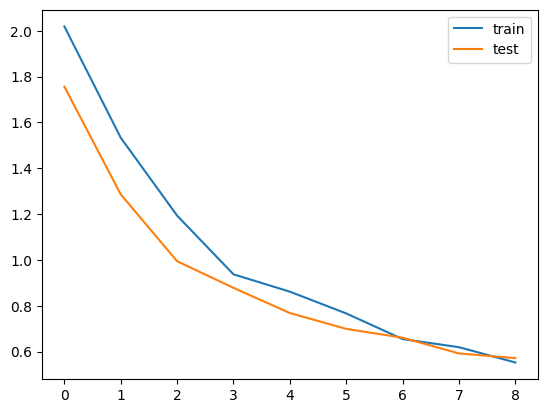

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

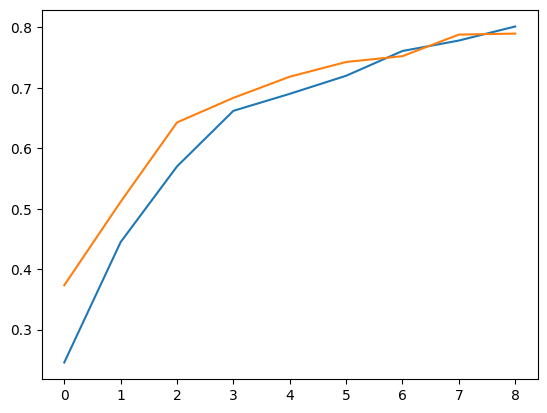

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.show()

In [ ]:
import cv2

#### open cv it is library used to deep ealrning for image,video analysis...

array([[[ 38,  75,  41],
        [ 46,  83,  49],
        [ 45,  82,  50],
        ...,
        [ 22,  41,  32],
        [ 18,  41,  27],
        [ 18,  41,  27]],

       [[ 49,  80,  49],
        [ 54,  85,  54],
        [ 51,  81,  52],
        ...,
        [ 19,  38,  29],
        [ 19,  39,  26],
        [ 26,  46,  33]],

       [[ 54,  84,  55],
        [ 45,  75,  46],
        [ 46,  75,  49],
        ...,
        [ 16,  37,  28],
        [ 26,  44,  31],
        [ 40,  58,  45]],

       ...,

       [[ 25,  49,  37],
        [ 25,  49,  37],
        [ 26,  52,  39],
        ...,
        [ 96, 149, 110],
        [ 84, 116, 111],
        [ 69,  99,  94]],

       [[ 28,  52,  42],
        [ 28,  52,  42],
        [ 32,  57,  47],
        ...,
        [ 99, 152, 113],
        [102, 144, 121],
        [ 88, 127, 105]],

       [[ 33,  57,  47],
        [ 31,  55,  45],
        [ 35,  60,  50],
        ...,
        [ 86, 139, 100],
        [ 93, 153, 113],
        [ 89, 143, 106]]], dtype=uint8)
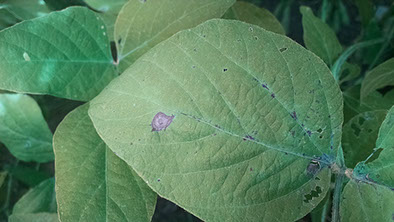

In [ ]:
test_img = cv2.imread("/content/close-up-of-target-spot-lesion-1.jpg")
test_img

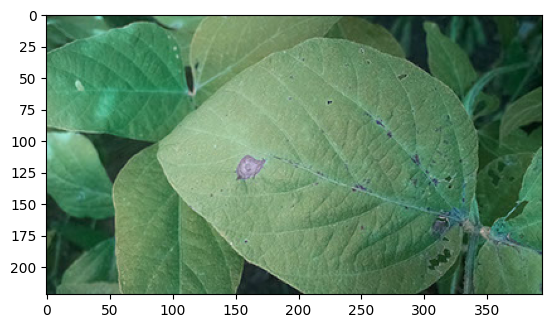

In [ ]:
# we can see this image by plt.imshow
plt.imshow(test_img)

In [ ]:
# here we need to resize this iamge...
test_inp = cv2.resize(test_img,(224,224))

array([[[ 41,  78,  44],
        [ 44,  81,  49],
        [ 43,  79,  51],
        ...,
        [ 15,  36,  28],
        [ 22,  41,  32],
        [ 18,  41,  27]],

       [[ 51,  82,  51],
        [ 50,  80,  51],
        [ 48,  77,  52],
        ...,
        [ 15,  36,  28],
        [ 19,  38,  29],
        [ 23,  43,  30]],

       [[ 50,  81,  51],
        [ 47,  77,  51],
        [ 61,  90,  65],
        ...,
        [ 14,  35,  27],
        [ 15,  37,  27],
        [ 34,  52,  39]],

       ...,

       [[ 25,  49,  37],
        [ 26,  52,  39],
        [ 23,  51,  38],
        ...,
        [ 87, 138, 100],
        [ 97, 150, 111],
        [ 75, 106, 100]],

       [[ 28,  52,  42],
        [ 32,  57,  47],
        [ 33,  60,  50],
        ...,
        [ 92, 143, 105],
        [ 99, 151, 112],
        [ 93, 133, 111]],

       [[ 32,  56,  46],
        [ 35,  60,  50],
        [ 40,  67,  56],
        ...,
        [ 92, 143, 105],
        [ 87, 139, 100],
        [ 90, 147, 108]]], dtype=uint8)
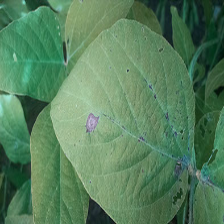

In [ ]:
test_inp

In [ ]:
# now we ahave to reshae this image...
test_input = test_inp.reshape(1,224,224,3)
test_input[:1]

array([[[[ 41,  78,  44],
         [ 44,  81,  49],
         [ 43,  79,  51],
         ...,
         [ 15,  36,  28],
         [ 22,  41,  32],
         [ 18,  41,  27]],

        [[ 51,  82,  51],
         [ 50,  80,  51],
         [ 48,  77,  52],
         ...,
         [ 15,  36,  28],
         [ 19,  38,  29],
         [ 23,  43,  30]],

        [[ 50,  81,  51],
         [ 47,  77,  51],
         [ 61,  90,  65],
         ...,
         [ 14,  35,  27],
         [ 15,  37,  27],
         [ 34,  52,  39]],

        ...,

        [[ 25,  49,  37],
         [ 26,  52,  39],
         [ 23,  51,  38],
         ...,
         [ 87, 138, 100],
         [ 97, 150, 111],
         [ 75, 106, 100]],

        [[ 28,  52,  42],
         [ 32,  57,  47],
         [ 33,  60,  50],
         ...,
         [ 92, 143, 105],
         [ 99, 151, 112],
         [ 93, 133, 111]],

        [[ 32,  56,  46],
         [ 35,  60,  50],
         [ 40,  67,  56],
         ...,
         [ 92, 143, 105],
        

In [ ]:
pred = model.predict(test_input)
pred

1/1 [==============================] - 0s 437ms/step


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.893063e-13, 0.000000e+00,
        0.000000e+00, 1.000000e+00]], dtype=float32)

### as we seen here our model edicting corretly unseen data...

In [ ]:
# Get the class indices from the training data generator
class_indices = train_gen.class_indices

# Reverse the mapping to get a dictionary of indices to class names
indices_to_class = {v: k for k, v in class_indices.items()}

# Print the mapping of indices to class names
print(indices_to_class)

{0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___Septoria_leaf_spot', 5: 'Tomato___Spider_mites Two-spotted_spider_mite', 6: 'Tomato___Target_Spot', 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 8: 'Tomato___Tomato_mosaic_virus', 9: 'Tomato___healthy'}


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img_path = "/content/close-up-of-target-spot-lesion-1.jpg"
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape(1,224,224,3)

In [ ]:
pred = model.predict(x)
pred

1/1 [==============================] - 0s 143ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.4284547e-33, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
class_indices = train_gen.class_indices

tomato_diease = {i:j for i,j in class_indices.items()}

tomato_diease

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}